In [1]:
import numpy as np
import matplotlib.pyplot as plt
import batman
from scipy.stats import norm
import emcee

I'm going to compare the uncertainty on each retrieved transit depth to the photon noise expectation. For each wavelength bin, I'll compute the photon noise expectation by generating a transit at that wavelength's best fit Rp/Rs using the same fixed orbital parameters used in the transmission spectrum fitting, scattering synthetic data around that transit with a noise level equal to the observed data's scatter, and re-retrieving the radius. The resulting uncertainty on that depth should represent the photon noise uncertainty in a more pragmatic manner than is predicted by PandExo.

In [2]:
def transit(rprs, initmodel):
    # Transit Light curve model
    # Inputs:
    # theta = array of lightcurve parameters
    # initmodel = pre-initialized BATMAN model environment, which increases efficiency

    # Unpack input parameters
    tc = t0_fixed       # time of conjunction [days]
    P = P_fixed  # compute Period in [day]
    a = a_fixed  # compute a/Rstar
    inc = inc_fixed  # Compute inclination in [deg]
    ecc = ecc_fixed    # use these if assuming circular orbit
    omega = w_fixed
    rprstar = np.copy(rprs)

    # Set batman parameters
    params = batman.TransitParams()
    params.t0 = tc             # transit midpoint [day]
    params.per = P    # log10 (period [day])
    params.rp = rprstar
    params.a = a      # log10 (semi major axis [Rstar])
    params.inc = inc  # cosine inclination [degrees]
    params.ecc = ecc
    params.w = omega
    params.limb_dark = 'quadratic'
    params.u = u_fixed

    lightcurve = initmodel.light_curve(params)
    return lightcurve
##
# Defining my systematic models
def hook(theta, torbit):
    # Orbit-long charge trapping hook model for HST
    # Inputs:
    # theta = array of lightcurve parameters
    # torbit = time since start of corresponding orbit in units [day]

    amplitude2 = theta[1]
    amplitude3 = theta[2]
    tau2 = theta[3]
    tau3 = theta[4]

    hookcurve = np.zeros(len(t_orbit))
    hookcurve[:17] = 1. - amplitude2*np.exp(torbit[:17]/tau2)
    hookcurve[17:] = 1. - amplitude3*np.exp(torbit[17:]/tau3)
    return hookcurve

def ramp(theta, tvisit):
    # Visit-long linear model for flux in time
    slope = theta[5]
    intercept = theta[6]

    y = intercept + (slope*tvisit)
    return y

In [3]:
def logLikelihood(ydata, yerr, modely):
    lnL = 0.
    chi_array = ((ydata - modely) ** 2. / yerr ** 2.) + np.log(2. * np.pi * yerr ** 2.)
    lnL += -0.5 * np.sum(chi_array)
    
    return lnL

def logPosterior(rprs, ydata, yerr, init_transitmodel):
    
    # generate the transit model
    transit_model = transit(rprs, init_transitmodel)
    # compute the likelihood
    lnLikelihood = logLikelihood(ydata, yerr, transit_model)
    
    return lnLikelihood

data loaded in
wavelength bin  0  ----
chains loaded in
best fit params computed
batman model initialized
best fit models initialized
residuals computed
synthetic transit generated using best fit Rp/Rs
synthetic observation generated with noise of 236.6 ppm, error of 236.6 ppm
running sampling of Rp/Rs


100%|██████████| 6000/6000 [00:02<00:00, 2770.21it/s]


Results:
From the synthetic observation
Best fit depth = 1718.2 +/- 59.4 ppm
Photon noise transit depth uncertianty = 59.4 ppm
From the real observation
Best fit depth = 1680.8 +/- 72.1 ppm
Real depth precision is 1.21 x the photon noise expectation


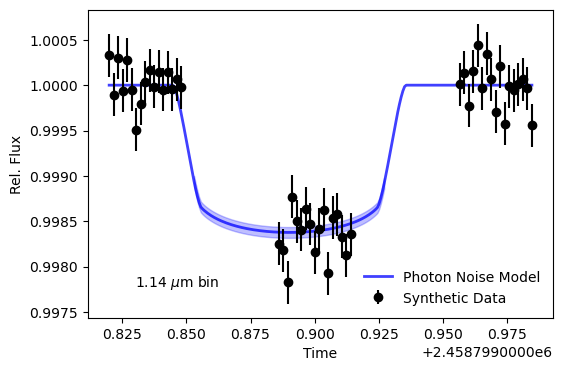

wavelength bin  1  ----
chains loaded in
best fit params computed
batman model initialized
best fit models initialized
residuals computed
synthetic transit generated using best fit Rp/Rs
synthetic observation generated with noise of 243.5 ppm, error of 243.5 ppm
running sampling of Rp/Rs


100%|██████████| 6000/6000 [00:02<00:00, 2740.51it/s]


Results:
From the synthetic observation
Best fit depth = 1622.7 +/- 63.5 ppm
Photon noise transit depth uncertianty = 63.5 ppm
From the real observation
Best fit depth = 1719.5 +/- 69.9 ppm
Real depth precision is 1.10 x the photon noise expectation


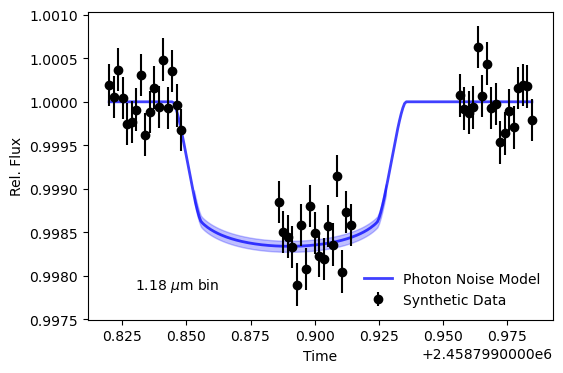

wavelength bin  2  ----
chains loaded in
best fit params computed
batman model initialized
best fit models initialized
residuals computed
synthetic transit generated using best fit Rp/Rs
synthetic observation generated with noise of 208.2 ppm, error of 208.2 ppm
running sampling of Rp/Rs


100%|██████████| 6000/6000 [00:02<00:00, 2760.89it/s]


Results:
From the synthetic observation
Best fit depth = 1761.0 +/- 53.2 ppm
Photon noise transit depth uncertianty = 53.2 ppm
From the real observation
Best fit depth = 1803.4 +/- 67.1 ppm
Real depth precision is 1.26 x the photon noise expectation


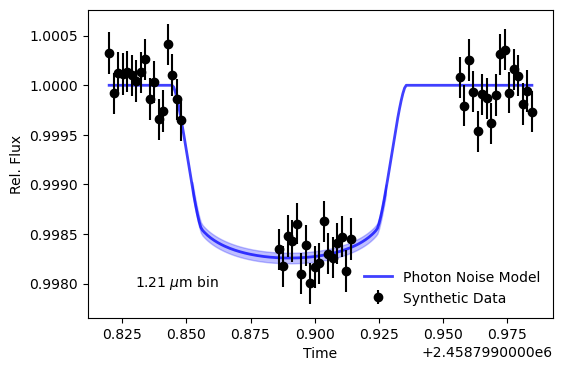

wavelength bin  3  ----
chains loaded in
best fit params computed
batman model initialized
best fit models initialized
residuals computed
synthetic transit generated using best fit Rp/Rs
synthetic observation generated with noise of 186.7 ppm, error of 186.7 ppm
running sampling of Rp/Rs


100%|██████████| 6000/6000 [00:02<00:00, 2749.76it/s]


Results:
From the synthetic observation
Best fit depth = 1649.2 +/- 47.6 ppm
Photon noise transit depth uncertianty = 47.6 ppm
From the real observation
Best fit depth = 1679.1 +/- 63.7 ppm
Real depth precision is 1.34 x the photon noise expectation


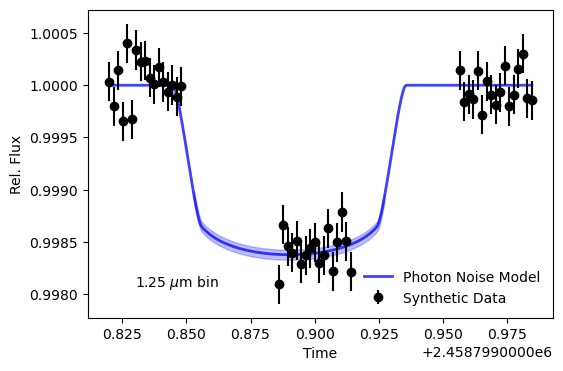

wavelength bin  4  ----
chains loaded in
best fit params computed
batman model initialized
best fit models initialized
residuals computed
synthetic transit generated using best fit Rp/Rs
synthetic observation generated with noise of 139.4 ppm, error of 139.4 ppm
running sampling of Rp/Rs


100%|██████████| 6000/6000 [00:02<00:00, 2762.08it/s]


Results:
From the synthetic observation
Best fit depth = 1818.8 +/- 35.3 ppm
Photon noise transit depth uncertianty = 35.3 ppm
From the real observation
Best fit depth = 1727.3 +/- 65.6 ppm
Real depth precision is 1.86 x the photon noise expectation


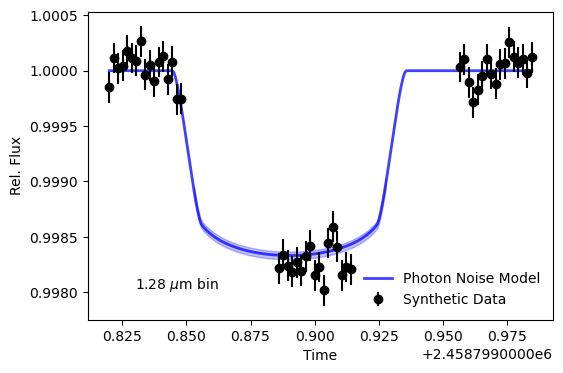

wavelength bin  5  ----
chains loaded in
best fit params computed
batman model initialized
best fit models initialized
residuals computed
synthetic transit generated using best fit Rp/Rs
synthetic observation generated with noise of 196.4 ppm, error of 196.4 ppm
running sampling of Rp/Rs


100%|██████████| 6000/6000 [00:02<00:00, 2757.04it/s]


Results:
From the synthetic observation
Best fit depth = 1642.2 +/- 47.6 ppm
Photon noise transit depth uncertianty = 47.6 ppm
From the real observation
Best fit depth = 1665.8 +/- 65.8 ppm
Real depth precision is 1.38 x the photon noise expectation


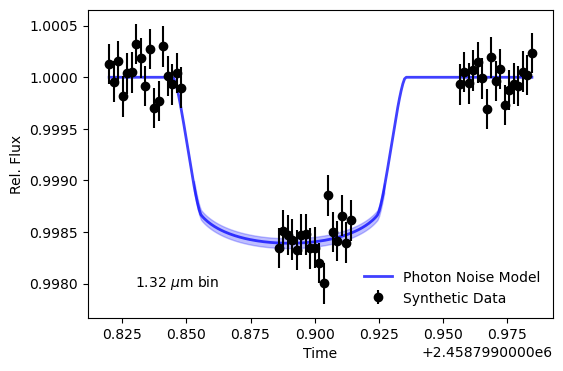

wavelength bin  6  ----
chains loaded in
best fit params computed
batman model initialized
best fit models initialized
residuals computed
synthetic transit generated using best fit Rp/Rs
synthetic observation generated with noise of 144.9 ppm, error of 144.9 ppm
running sampling of Rp/Rs


100%|██████████| 6000/6000 [00:02<00:00, 2729.89it/s]


Results:
From the synthetic observation
Best fit depth = 1723.5 +/- 36.7 ppm
Photon noise transit depth uncertianty = 36.7 ppm
From the real observation
Best fit depth = 1715.4 +/- 64.6 ppm
Real depth precision is 1.76 x the photon noise expectation


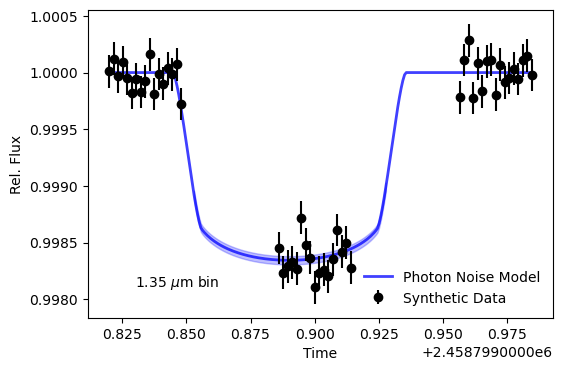

wavelength bin  7  ----
chains loaded in
best fit params computed
batman model initialized
best fit models initialized
residuals computed
synthetic transit generated using best fit Rp/Rs
synthetic observation generated with noise of 152.4 ppm, error of 152.4 ppm
running sampling of Rp/Rs


100%|██████████| 6000/6000 [00:02<00:00, 2747.74it/s]


Results:
From the synthetic observation
Best fit depth = 1862.5 +/- 38.8 ppm
Photon noise transit depth uncertianty = 38.8 ppm
From the real observation
Best fit depth = 1869.3 +/- 65.1 ppm
Real depth precision is 1.68 x the photon noise expectation


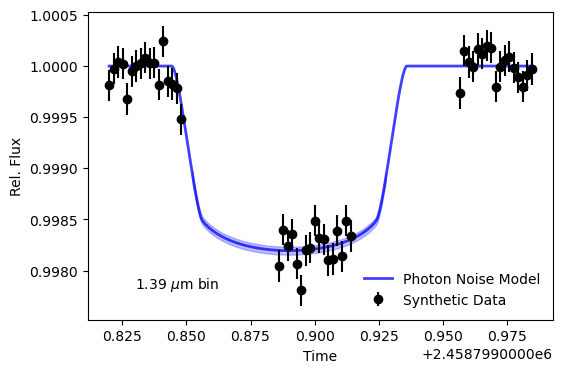

wavelength bin  8  ----
chains loaded in
best fit params computed
batman model initialized
best fit models initialized
residuals computed
synthetic transit generated using best fit Rp/Rs
synthetic observation generated with noise of 147.4 ppm, error of 147.4 ppm
running sampling of Rp/Rs


100%|██████████| 6000/6000 [00:02<00:00, 2748.04it/s]


Results:
From the synthetic observation
Best fit depth = 2011.1 +/- 38.5 ppm
Photon noise transit depth uncertianty = 38.5 ppm
From the real observation
Best fit depth = 1947.2 +/- 67.1 ppm
Real depth precision is 1.74 x the photon noise expectation


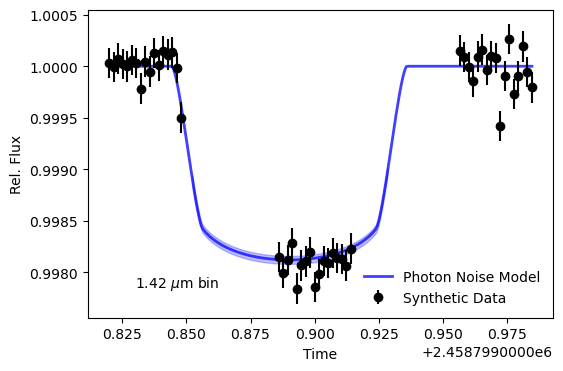

wavelength bin  9  ----
chains loaded in
best fit params computed
batman model initialized
best fit models initialized
residuals computed
synthetic transit generated using best fit Rp/Rs
synthetic observation generated with noise of 165.9 ppm, error of 165.9 ppm
running sampling of Rp/Rs


100%|██████████| 6000/6000 [00:02<00:00, 2752.67it/s]


Results:
From the synthetic observation
Best fit depth = 1847.6 +/- 41.0 ppm
Photon noise transit depth uncertianty = 41.0 ppm
From the real observation
Best fit depth = 1914.8 +/- 66.5 ppm
Real depth precision is 1.62 x the photon noise expectation


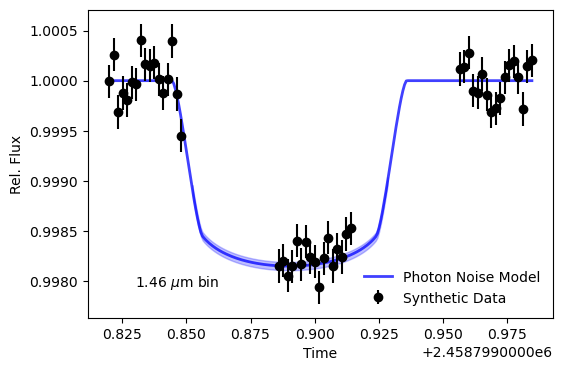

wavelength bin  10  ----
chains loaded in
best fit params computed
batman model initialized
best fit models initialized
residuals computed
synthetic transit generated using best fit Rp/Rs
synthetic observation generated with noise of 249.5 ppm, error of 249.5 ppm
running sampling of Rp/Rs


100%|██████████| 6000/6000 [00:02<00:00, 2756.18it/s]


Results:
From the synthetic observation
Best fit depth = 1944.4 +/- 61.9 ppm
Photon noise transit depth uncertianty = 61.9 ppm
From the real observation
Best fit depth = 1828.5 +/- 66.0 ppm
Real depth precision is 1.07 x the photon noise expectation


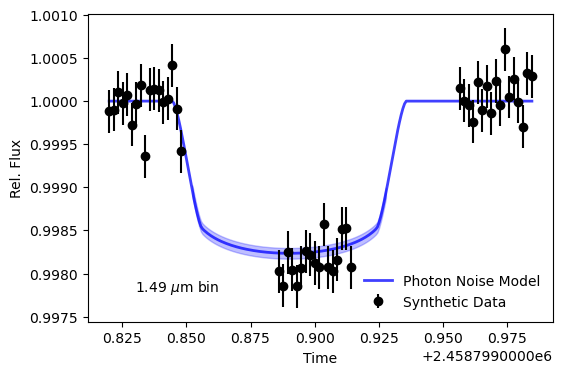

wavelength bin  11  ----
chains loaded in
best fit params computed
batman model initialized
best fit models initialized
residuals computed
synthetic transit generated using best fit Rp/Rs
synthetic observation generated with noise of 157.8 ppm, error of 157.8 ppm
running sampling of Rp/Rs


100%|██████████| 6000/6000 [00:02<00:00, 2750.10it/s]


Results:
From the synthetic observation
Best fit depth = 1811.6 +/- 39.9 ppm
Photon noise transit depth uncertianty = 39.9 ppm
From the real observation
Best fit depth = 1847.1 +/- 68.8 ppm
Real depth precision is 1.72 x the photon noise expectation


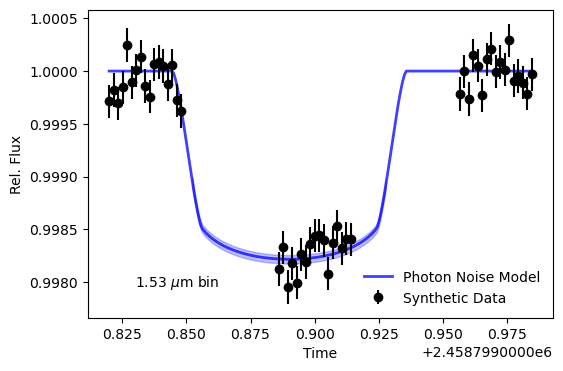

wavelength bin  12  ----
chains loaded in
best fit params computed
batman model initialized
best fit models initialized
residuals computed
synthetic transit generated using best fit Rp/Rs
synthetic observation generated with noise of 218.5 ppm, error of 218.5 ppm
running sampling of Rp/Rs


100%|██████████| 6000/6000 [00:02<00:00, 2747.75it/s]


Results:
From the synthetic observation
Best fit depth = 1976.4 +/- 54.8 ppm
Photon noise transit depth uncertianty = 54.8 ppm
From the real observation
Best fit depth = 1874.6 +/- 71.0 ppm
Real depth precision is 1.30 x the photon noise expectation


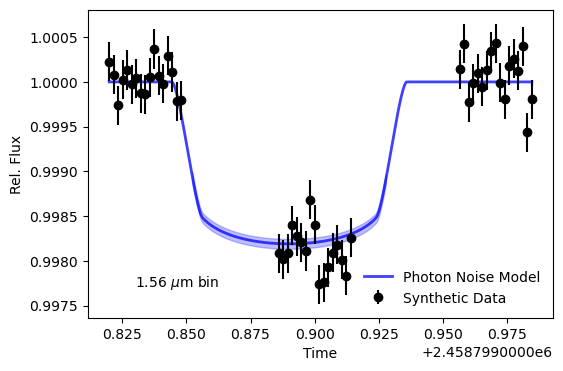

wavelength bin  13  ----
chains loaded in
best fit params computed
batman model initialized
best fit models initialized
residuals computed
synthetic transit generated using best fit Rp/Rs
synthetic observation generated with noise of 207.8 ppm, error of 207.8 ppm
running sampling of Rp/Rs


100%|██████████| 6000/6000 [00:02<00:00, 2732.51it/s]


Results:
From the synthetic observation
Best fit depth = 1863.6 +/- 53.1 ppm
Photon noise transit depth uncertianty = 53.1 ppm
From the real observation
Best fit depth = 1871.3 +/- 70.9 ppm
Real depth precision is 1.33 x the photon noise expectation


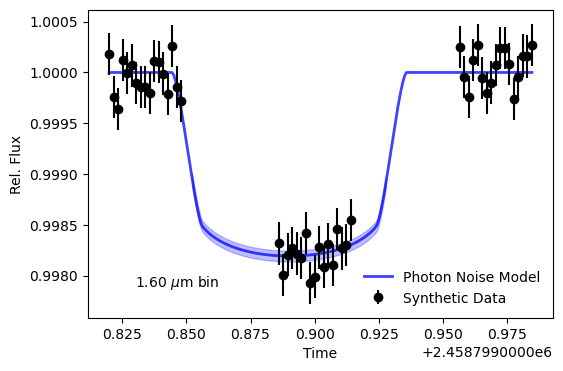

wavelength bin  14  ----
chains loaded in
best fit params computed
batman model initialized
best fit models initialized
residuals computed
synthetic transit generated using best fit Rp/Rs
synthetic observation generated with noise of 243.6 ppm, error of 243.6 ppm
running sampling of Rp/Rs


100%|██████████| 6000/6000 [00:02<00:00, 2716.69it/s]


Results:
From the synthetic observation
Best fit depth = 1895.4 +/- 61.4 ppm
Photon noise transit depth uncertianty = 61.4 ppm
From the real observation
Best fit depth = 1847.9 +/- 74.3 ppm
Real depth precision is 1.21 x the photon noise expectation


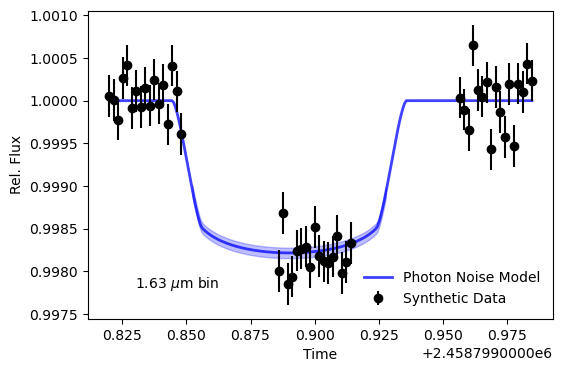

In [6]:
## Loading in the extracted, binned spectral lighcurves
tsdata = np.load('/home/mmmurphy/data/hd219666b/reduced_data/Transit_Spectra_NoFirst_Visit3.npz')
times = tsdata['time']
rawfluxes = tsdata['flux']
rawerrors = tsdata['error']
scandirs = tsdata['scandir']
wavelengths = tsdata['WaveCenters']  # [microns]
print('data loaded in')

t_visit = times - times[0]
# Pull out times [in day; MJD] of each orbit
orbit_ends = np.array([17, 34, 51])
orbit2times = times[:orbit_ends[0]]
orbit3times = times[orbit_ends[0] : orbit_ends[1]]
orbit4times = times[orbit_ends[1] : orbit_ends[2]]

# From above, compute time since beginning of orbit for each
tinorbit2 = orbit2times - orbit2times[0]
tinorbit3 = orbit3times - orbit3times[0]
tinorbit4 = orbit4times - orbit4times[0]
t_orbit = np.concatenate((tinorbit2, tinorbit3, tinorbit4))

fluxes = np.copy(rawfluxes)
errors = np.copy(rawerrors)
Nbins = rawfluxes.shape[0]
for wav in range(Nbins):
    sd1_idxs = np.where(scandirs == 1.)[0]
    sd0_idxs = np.where(scandirs == 0.)[0]

    normval1 = np.median(fluxes[wav, sd1_idxs])
    normval0 = np.median(fluxes[wav, sd0_idxs])

    fluxes[wav, sd1_idxs] /= normval1
    errors[wav, sd1_idxs] /= normval1
    fluxes[wav, sd0_idxs] /= normval0
    errors[wav, sd0_idxs] /= normval0

#error_correction_factor = 3.0
#errors /= error_correction_factor   
    
Npoints = fluxes.shape[1]
Nwaves = fluxes.shape[0]
    
## loading in the best fit paramaeter chains
for wavebin in range(Nwaves):
#     if wavebin != 0:
#         continue
    
    wav_flux = fluxes[wavebin,:]
    wav_errs = errors[wavebin,:]
        
    print('wavelength bin ', wavebin, ' ----')
    path = '/home/mmmurphy/data/hd219666b/mcmc_results/tspec/'
    ffile = path+'flatsamples_wav'+str(wavebin)+'.npy'
    wav_flatsamples = np.load(ffile)
    print('chains loaded in')

    real_depthchain = wav_flatsamples[:,0]**2
    real_depth = np.median(real_depthchain)
    real_depth_uperr = np.percentile(real_depthchain, 84) - real_depth
    real_depth_loerr = real_depth - np.percentile(real_depthchain, 16)
    real_deptherr = np.mean((real_depth_loerr, real_depth_uperr))
    
    param_fits = np.asarray([np.median(wav_flatsamples[:,i]) for i in range(wav_flatsamples.shape[1])])
    param_uperrs = np.asarray([np.percentile(wav_flatsamples[:,i], 84) for i in range(wav_flatsamples.shape[1])]) - param_fits
    param_loerrs = param_fits - np.asarray([np.percentile(wav_flatsamples[:,i], 16) for i in range(wav_flatsamples.shape[1])])
    param_errs = np.mean((param_uperrs, param_loerrs), axis=0)
    
    wav_rprs, wav_rprs_err = param_fits[0], param_errs[0]
    print('best fit params computed')
        
    rprs_init, rprs_init_unc = 0.0429416, 0.00033254
    t0_fixed = 2458329.2016137  # [day]
    P_fixed =  10. ** 0.780639       # [day]
    a_fixed = 10. ** 1.12013           # [Rs]
    inc_fixed = (180. / np.pi) * np.arccos(np.fabs(0.0633181))   # [degrees]
    ecc_fixed = 0.
    w_fixed = 90.
    u_fixed = [0.16, 0.31]

    # Initializing the BATMAN model
    InitParams = batman.TransitParams()
    InitParams.t0 = t0_fixed     
    InitParams.per = P_fixed
    InitParams.a = a_fixed
    InitParams.inc = inc_fixed
    InitParams.rp = rprs_init
    InitParams.ecc = ecc_fixed
    InitParams.w = w_fixed
    InitParams.limb_dark = 'quadratic'
    InitParams.u = u_fixed
    BATMAN_initmodel = batman.TransitModel(InitParams, times)
    print('batman model initialized')
        
    wav_transit = transit(param_fits[0], BATMAN_initmodel)
    wav_hook = hook(param_fits, t_orbit)
    wav_ramp = ramp(param_fits, t_visit)
    wav_sys = wav_hook * wav_ramp
    wav_model = wav_transit * wav_sys
    print('best fit models initialized')

    wav_flux, wav_err = fluxes[wavebin, :], errors[wavebin,:]
    wav_detflux, wav_deterr = wav_flux / wav_sys, wav_err / wav_sys
    wav_residuals = (wav_flux - wav_model)
    mean_residual, sd_residual = norm.fit(wav_residuals)
    mean_abs_residual = np.mean(abs(wav_residuals))
    print('residuals computed')
    
    # Initializing the new BATMAN model
    SynthParams = batman.TransitParams()
    SynthParams.t0 = t0_fixed     
    SynthParams.per = P_fixed
    SynthParams.a = a_fixed
    SynthParams.inc = inc_fixed
    SynthParams.rp = wav_rprs
    SynthParams.ecc = ecc_fixed
    SynthParams.w = w_fixed
    SynthParams.limb_dark = 'quadratic'
    SynthParams.u = u_fixed
    BATMAN_synthmodel = batman.TransitModel(SynthParams, times)
    synth_model = BATMAN_synthmodel.light_curve(SynthParams)
    print('synthetic transit generated using best fit Rp/Rs')
    
    synth_flux = np.ones(len(synth_model))
    synth_errs = np.ones(len(synth_model))
    error_scaling = np.mean(wav_errs) / sd_residual
    
    for i, val in enumerate(times):
        jitter = np.random.normal(0., sd_residual)
        synth_flux[i] = synth_model[i] + jitter
        synth_errs[i] = wav_errs[i] / error_scaling
    print('synthetic observation generated with noise of %.1f ppm, error of %.1f ppm'%(1.e6*sd_residual, 1.e6*np.mean(synth_errs)))
    
    # setting up the MCMC to re-retrieve the radius
    rprs_init, rprs_init_err = np.copy(wav_rprs), np.copy(wav_rprs_err)
    Nwalkers = 5
    pos = np.zeros((Nwalkers,1))
    pos[:,0] = rprs_init + 0.5*np.random.normal(0., rprs_init_err, Nwalkers)
    
    Nburn = 1000
    Nsteps = 5000 + Nburn
    
    print('running sampling of Rp/Rs')
    sampler = emcee.EnsembleSampler(Nwalkers, 1, logPosterior,
                                   args=(synth_flux, synth_errs, BATMAN_synthmodel))
    sampler.run_mcmc(pos, Nsteps, progress=True)
    flatsamples = sampler.get_chain(discard=Nburn, flat=True)
    rprs_chain = np.copy(flatsamples)
    depth_chain = flatsamples**2
    
    retrieved_rprs = np.median(rprs_chain)
    rpup_err = np.percentile(rprs_chain, 84) - retrieved_rprs
    rplo_err = retrieved_rprs - np.percentile(rprs_chain, 16)
    gauss_err_rprs = np.mean((rplo_err, rpup_err))
    
    retrieved_depth = np.median(depth_chain)
    up_err = np.percentile(depth_chain, 84) - retrieved_depth
    lo_err = retrieved_depth - np.percentile(depth_chain, 16)
    gauss_err = np.mean((lo_err, up_err))
    
    print('Results:')
    print('From the synthetic observation')
    print('Best fit depth = %.1f +/- %.1f ppm'%(1.e6*retrieved_depth, 1.e6*gauss_err))
    print('Photon noise transit depth uncertianty = %.1f ppm'%(1.e6*gauss_err))
    print('From the real observation')
    print('Best fit depth = %.1f +/- %.1f ppm'%(1.e6*real_depth, 1.e6*real_deptherr))
    print('Real depth precision is %.2f x the photon noise expectation'%(real_deptherr / gauss_err))
    
    # generating models for visualization
    t_plotting = np.linspace(times[0], times[-1], 250)
    PlotParams = batman.TransitParams()
    PlotParams.t0 = t0_fixed     
    PlotParams.per = P_fixed
    PlotParams.a = a_fixed
    PlotParams.inc = inc_fixed
    PlotParams.rp = wav_rprs
    PlotParams.ecc = ecc_fixed
    PlotParams.w = w_fixed
    PlotParams.limb_dark = 'quadratic'
    PlotParams.u = u_fixed
    BATMAN_plotmodel = batman.TransitModel(PlotParams, t_plotting)
    lc_plotting = BATMAN_plotmodel.light_curve(PlotParams)
    lc_unc_plotting = np.copy(lc_plotting)
    intran_idxs = np.where(lc_plotting < 0.999)
    
    fig, ax = plt.subplots(figsize=(6,4))
    ax.plot(t_plotting, lc_plotting, c='blue', lw=2, alpha=0.75, label='Photon Noise Model')
    ax.fill_between(t_plotting[intran_idxs], lc_plotting[intran_idxs]-gauss_err, 
                   lc_plotting[intran_idxs]+gauss_err, color='blue', alpha=0.25)
    ax.errorbar(times, synth_flux, synth_errs, marker='o', ls='None', c='black', label='Synthetic Data')
    ax.text(0.1, 0.1, r'%.2f $\mu$m bin'%(wavelengths[wavebin]), c='black', transform=ax.transAxes)
    ax.set(xlabel='Time', ylabel='Rel. Flux')
    ax.legend(loc='lower right', frameon=False)
    plt.show()
    
    

In [20]:
gauss_err_rprs

0.0018808947375667205

In [9]:
wav_rprs

0.04298721240406951

In [10]:
param_errs

array([8.64559603e-04, 1.71984860e-04, 1.27649645e-04, 4.89696853e-04,
       4.57547223e-04, 5.42064058e-04, 7.03601953e-05])